[0.51143921 0.76951023 0.81393008 0.75588647 0.89423373 0.72775794
 0.37599241 0.64543067 0.68943264 0.8189193 ]
[1.01704778 1.91431534 1.41805965 1.45547235 2.19745665 1.36038625
 0.86419505 1.42356602 1.90797902 1.51854378]
R-squared: 0.616893


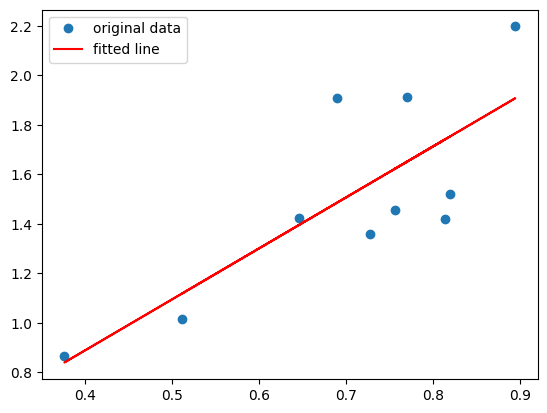

slope (95%): 2.061180 +/- 1.324300
intercept (95%): 0.064354 +/- 0.947661


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import t

rng = np.random.default_rng()
x = rng.random(10)       
y = 1.6*x + rng.random(10)      #equation 
res = stats.linregress(x, y)
print(x)
print(y)
print(f"R-squared: {res.rvalue**2:.6f}")
plt.plot(x, y, 'o', label='original data')
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
plt.legend()
plt.show()
tinv = lambda p, df: abs(t.ppf(p/2, df))
ts = tinv(0.05, len(x)-2)
print(f"slope (95%): {res.slope:.6f} +/- {ts*res.stderr:.6f}")
print(f"intercept (95%): {res.intercept:.6f}" f" +/- {ts*res.intercept_stderr:.6f}")

[2.45217072 1.24549159 0.45812511]


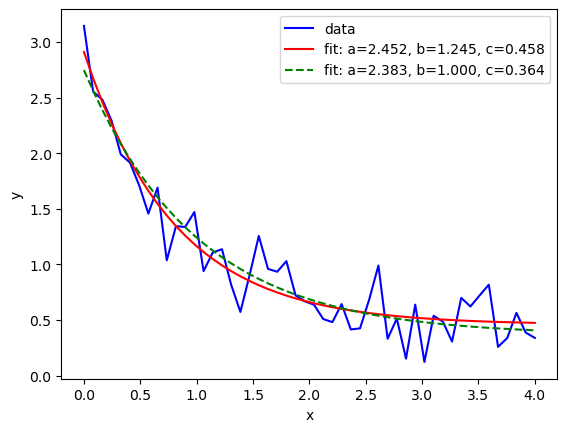

29.911187021410353
2.425940255550736e+31
[1.16944438e+28 1.94660540e-02 6.16360345e-03 1.88023192e+28]


In [9]:
#Curve fitting with exponential decay
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
rng = np.random.default_rng()
y_noise = 0.2 * rng.normal(size=xdata.size)
ydata = y + y_noise
plt.plot(xdata, ydata, 'b-', label='data')

popt, pcov = curve_fit(func, xdata, ydata)
print(popt)
plt.plot(xdata, func(xdata, *popt), 'r-',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [3., 1., 0.5]))
plt.plot(xdata, func(xdata, *popt), 'g--',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

print (np.linalg.cond(pcov))
def func2(x, a, b, c, d):
    return a * d * np.exp(-b * x) + c  # a and d are redundant
popt, pcov = curve_fit(func2, xdata, ydata)
print (np.linalg.cond(pcov))
print (np.diag(pcov))
#Note that the first and last terms are much larger than the other elements, suggesting that the optimal values of these parameters are ambiguous and that only one of these parameters is needed in the model.

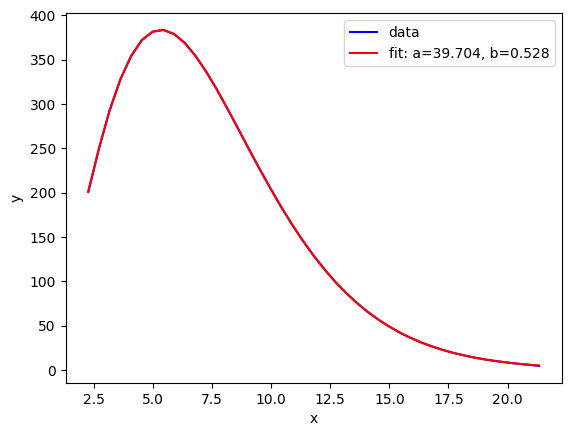

In [12]:
import numpy as np
import scipy
from scipy import constants
from scipy.constants import Planck
from scipy.constants import Boltzmann
from scipy.constants import speed_of_light
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

cf=1.25664e-19
sl=scipy.constants.speed_of_light
planck=scipy.constants.Planck
boltzman=scipy.constants.Boltzmann

def func(x,a,b):
    return  a*x**3/(np.exp(b * x) -1)
xdata= np.linspace(2.27, 21.33, 43)
factor=1.0
y1data= np.array([200.7, 249.5, 293.024, 327.8, 354.0, 372.0, 381.5, 383.5, 378.9, 368.8, 354.1, 336.3, 316.1, 293.9, 271.4, 248.2, 225.9, 204.3, 183.3, 163.8, 145.7, 128.8, 113.6, 99.5, 87.0, 75.9, 65.8, 57.0, 49.2, 42.2, 36.3, 31.0, 26.6, 22.6, 19.2, 16.4, 13.8, 11.7, 9.9, 8.4, 7.0, 5.8, 4.5 ])
ydata=y1data/factor
plt.plot(xdata, ydata, 'b-', label='data')
popt, pcov = curve_fit(func, xdata, ydata)
plt.plot(xdata, func(xdata,*popt), 'r-',label='fit: a=%5.3f, b=%5.3f' % tuple(popt))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

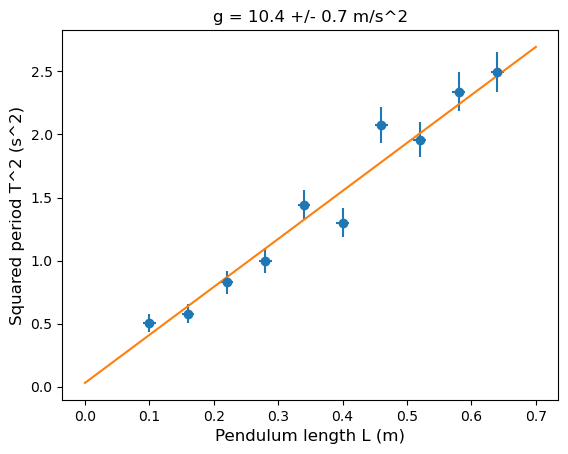

In [1]:
import numpy as np
from scipy import *
from scipy.optimize import curve_fit

## Input data (generated by simulation with random noise).
L = np.array([0.10, 0.16, 0.22, 0.28, 0.34, 0.40, 0.46, 0.52, 0.58, 0.64])
dL = np.array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01])
T = np.array([0.71, 0.76, 0.91, 1.00, 1.20, 1.14, 1.44, 1.40, 1.53, 1.58])
dT = np.array([0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05])
Tsq = T**2 # Estimates for T^2
Tsq_error = 2*T*dT # Errors for T^2, from error propagation rules

## Define an order-1 polynomial function, and use it to fit the data.
def f(x, b0, b1): return b0 + b1*x
est, covar = curve_fit(f, L, Tsq, sigma=Tsq_error)

## Estimators and their errors:
b0, b1 = est # Estimates of intercept and slope
db0 = np.sqrt(covar[0,0]) # Standard error of intercept
db1 = np.sqrt(covar[1,1]) # Standard error of slope
g = 4*np.pi*np.pi/b1 # Estimate for g (computed from b1)
dg = (g/b1)*db1 # Estimate for standard error of g

## Plot the data points, with error bars
import matplotlib.pyplot as plt
plt.errorbar(L, Tsq, xerr=dL, yerr=Tsq_error, fmt='o')
plt.xlabel('Pendulum length L (m)', fontsize=12)
plt.ylabel('Squared period T^2 (s^2)', fontsize=12)

## Include the fitted curve in the plot
L2 = np.linspace(0, 0.7, 100)
plt.plot(L2, b0 + b1*L2)

## State fitted value of g in the figure title
plt.title("g = {:.1f} +/- {:.1f} m/s^2".format(g, dg), fontsize=12)
plt.show()